In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
adf = df.drop(['Name','PassengerId','Ticket','Cabin'], axis = 1)
adf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
sex = pd.get_dummies(df[['Sex', 'Embarked']])
adf = pd.concat([sex,adf], axis = 1).drop(['Sex', 'Embarked'], axis = 1)

In [24]:
adf.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500


In [16]:
average_age = adf.groupby('Pclass').mean()['Age']
average_age[1]

38.233440860215055

In [90]:
adf.head() 

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500


In [96]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]   
    if pd.isnull(Age):
        return average_age[Pclass]
    else:
        return Age
    
adf['Age'] = adf[['Age','Pclass']].apply(impute_age,axis=1)
adf.head(10)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.00000,1,0,7.2500
1,1,0,1,0,0,1,1,38.00000,1,0,71.2833
2,1,0,0,0,1,1,3,26.00000,0,0,7.9250
3,1,0,0,0,1,1,1,35.00000,1,0,53.1000
4,0,1,0,0,1,0,3,35.00000,0,0,8.0500
5,0,1,0,1,0,0,3,25.14062,0,0,8.4583
6,0,1,0,0,1,0,1,54.00000,0,0,51.8625
7,0,1,0,0,1,0,3,2.00000,3,1,21.0750
8,1,0,0,0,1,1,3,27.00000,0,2,11.1333
9,1,0,1,0,0,1,2,14.00000,1,0,30.0708


In [10]:
anotherdf.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,0,3,22.0,1,0,7.2500
1,1,0,1,0,0,1,1,38.0,1,0,71.2833
2,1,0,0,0,1,1,3,26.0,0,0,7.9250
3,1,0,0,0,1,1,1,35.0,1,0,53.1000
4,0,1,0,0,1,0,3,35.0,0,0,8.0500


In [38]:
for i in (1, 2, 3):
    a = anotherdf[anotherdf['Pclass'] == i].fillna(average_age[i])


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
X = a.drop('Survived', axis = 1)
y = a['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [49]:
model = KNeighborsClassifier()

In [50]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [54]:
predict = model.predict(X_test)
predict[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [55]:
predictpb = model.predict_proba(X_test)
predictpb[:5]

array([[0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ]])

In [56]:
print('Confusion matrix of the model')
print(confusion_matrix(y_test, predict))
print()
print('Classification method of the model')
print(classification_report(y_test, predict))

Confusion matrix of the model
[[67  7]
 [13 12]]

Classification method of the model
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        74
           1       0.63      0.48      0.55        25

   micro avg       0.80      0.80      0.80        99
   macro avg       0.73      0.69      0.71        99
weighted avg       0.79      0.80      0.79        99



With n =  1 , score =  0.7474747474747475
With n =  2 , score =  0.7474747474747475
With n =  3 , score =  0.7777777777777778
With n =  4 , score =  0.7878787878787878
With n =  5 , score =  0.797979797979798
With n =  6 , score =  0.7373737373737373
With n =  7 , score =  0.7373737373737373
With n =  8 , score =  0.7373737373737373
With n =  9 , score =  0.7474747474747475
With n =  10 , score =  0.7474747474747475
With n =  11 , score =  0.7474747474747475
With n =  12 , score =  0.7474747474747475
With n =  13 , score =  0.7272727272727273
With n =  14 , score =  0.7272727272727273
With n =  15 , score =  0.7272727272727273
With n =  16 , score =  0.7272727272727273
With n =  17 , score =  0.7272727272727273
With n =  18 , score =  0.7272727272727273
With n =  19 , score =  0.7272727272727273


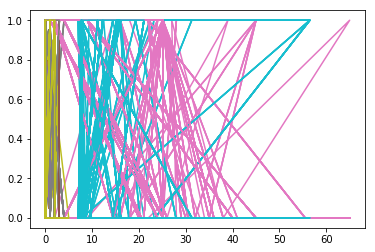

In [67]:
for i in range(1, 20):
    fake_model = KNeighborsClassifier(n_neighbors=i)
    fake_model.fit(X_train, y_train)
    predict = fake_model.predict(X_test)
    print('With n = ', i, ', score = ', accuracy_score(y_test, predict))
    plt.plot(X_test, predict)

# Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression